In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('MagicBricks.csv')

In [14]:
df.shape

(1259, 11)

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [20]:
750*6667

5000250

In [4]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

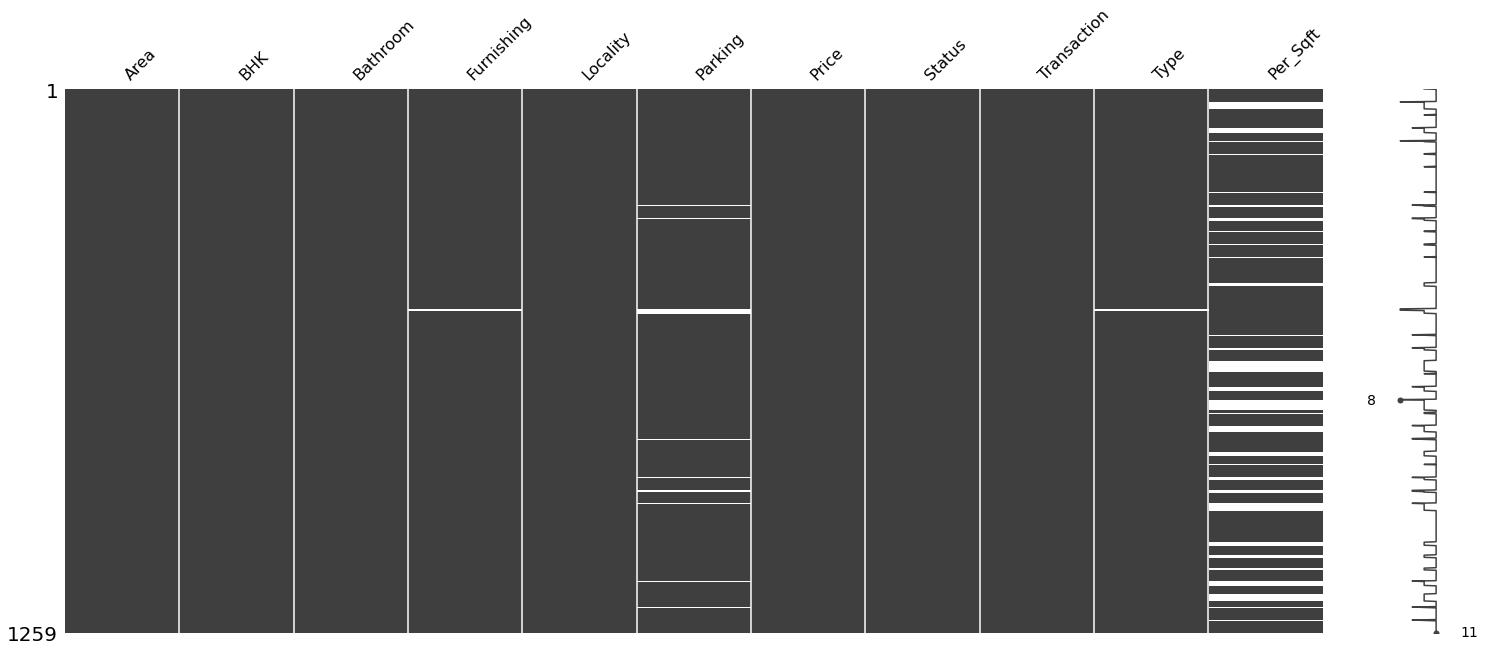

In [12]:
missingno.matrix(df)

#### Dropping Price Per Sqft 
<br>
We need to predict price and hence price_per_sqft might be a subset of it. Since its redundant and causes multicolinearity, caio per_sqft.!
<br>
PS if rqd, we can easily fill them up using Price/Area=Price_per_sqft but isn't reqd.

In [34]:
df.drop(['Per_Sqft'], axis='columns',inplace=True)

In [38]:
df.isna().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
dtype: int64

In [40]:
df.Bathroom.unique()

array([ 2.,  3.,  4.,  1., nan,  5.,  6.,  7.])

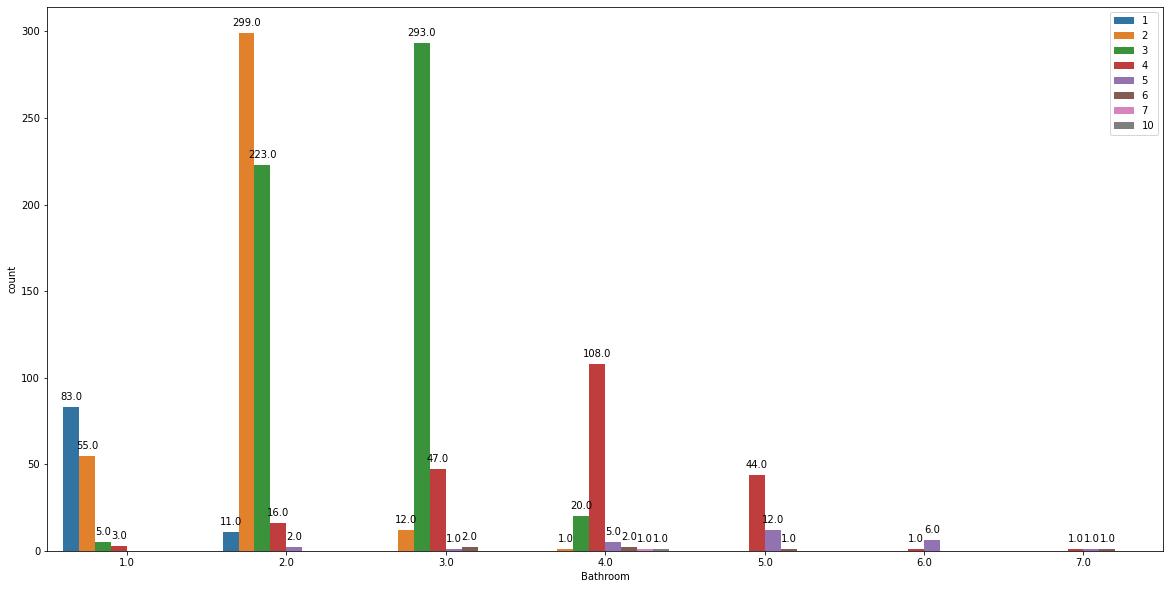

In [49]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='Bathroom',hue='BHK', data=df)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend(loc='upper right')

In [51]:
df[df['Bathroom'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment


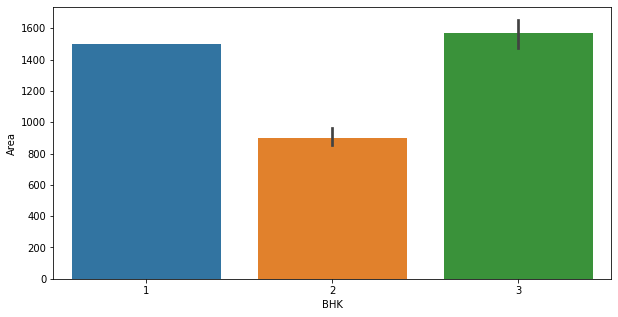

In [84]:
plt.figure(figsize=(10,5))
g = sns.barplot(x='BHK',y='Area', data=df[df['Locality'] == 'Lajpat Nagar 2'])

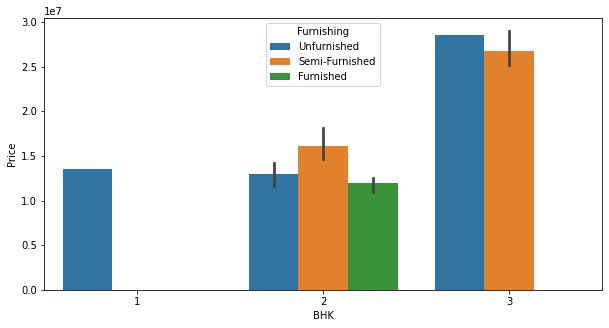

In [83]:
plt.figure(figsize=(10,5))
g = sns.barplot(x='BHK',y='Price',hue='Furnishing', data=df[df['Locality'] == 'Lajpat Nagar 2'])

In [72]:
df[(df['Locality'] == 'Lajpat Nagar 2') & (df['BHK'] == 1)]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment


#### Missing Bathroom Dilemma
Both entries where Bathroom is missing is 1BHK.  Most likeliy that would have 1 Bathroom. On the contrary, it has a huge area so having 2 bathrooms is a possibility. Since there is not much data, dropping them probably is not a good idea. Lets fill them as 2.

In [85]:
df.Bathroom.fillna(2,inplace=True)

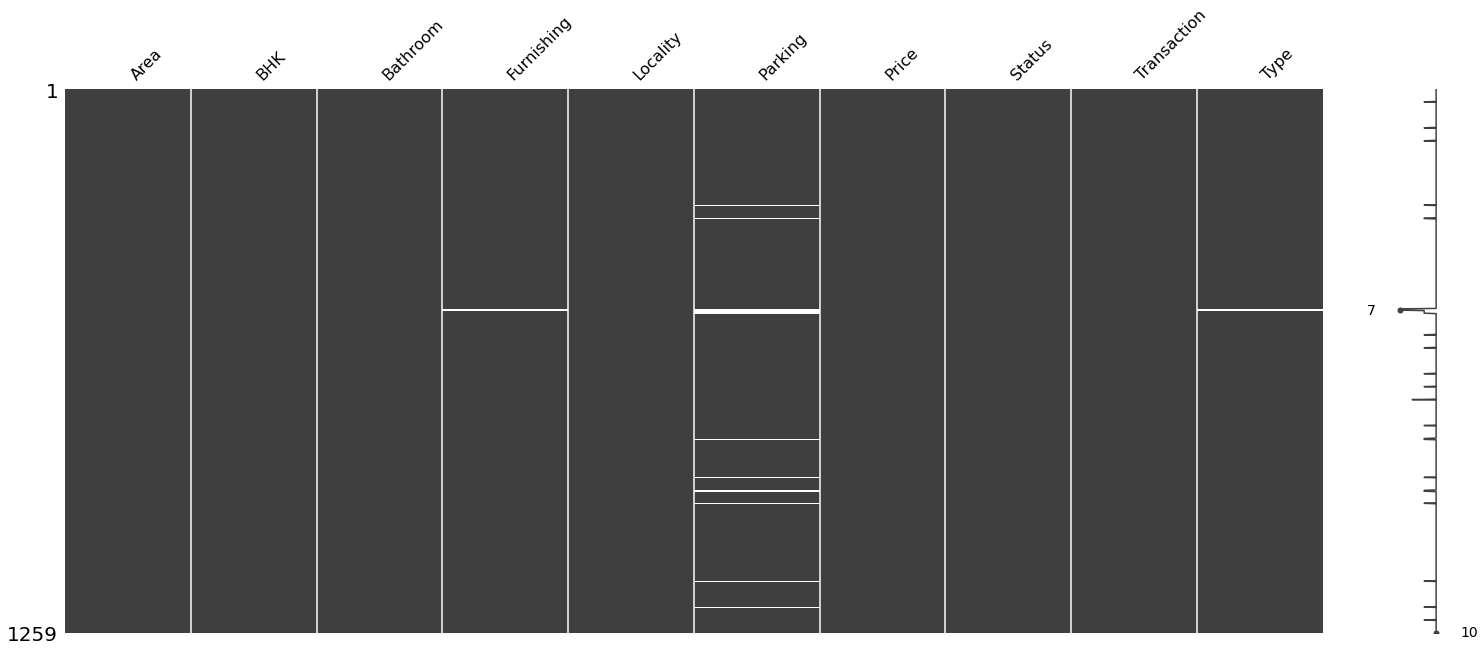

In [86]:
missingno.matrix(df)